In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

# 한글 깨짐 방지
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [52]:
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,20,70]}
df = pd.DataFrame(data,index=['a','b','c','d'])
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [44]:
def fn(v):
    print('==========')
    print('v =>',v)
    print('==========')
    return v.sum()

In [45]:
# 컬럼시리즈가 fn의 값으로 넘어감
df.apply(fn)

v => a    10
b    30
c    50
d    70
Name: eng, dtype: int64
v => a    20
b    40
c    60
d    80
Name: kor, dtype: int64
v => a    90
b    50
c    20
d    70
Name: math, dtype: int64


eng     160
kor     200
math    230
dtype: int64

In [46]:
# 행별 시리즈가 fn의 값으로 넘어검
df.apply(fn, axis=1)

v => eng     10
kor     20
math    90
Name: a, dtype: int64
v => eng     30
kor     40
math    50
Name: b, dtype: int64
v => eng     50
kor     60
math    20
Name: c, dtype: int64
v => eng     70
kor     80
math    70
Name: d, dtype: int64


a    120
b    120
c    130
d    220
dtype: int64

In [47]:
df.apply(lambda v:v.sum(), axis=1)

a    120
b    120
c    130
d    220
dtype: int64

In [48]:
df['결과'] = df.apply(lambda v:'합격' if v.mean()>=70 else '불합격', axis=1)

In [51]:
df

,eng,kor,math,결과
a,10,20,90,불합격
b,30,40,50,불합격
c,50,60,20,불합격
d,70,80,70,합격


In [54]:
# 높은값 추출 (갯수, 컬럼명)
df.nlargest(2,'eng')

,eng,kor,math
d,70,80,70
c,50,60,20


### 시각화

In [57]:
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


<AxesSubplot:>

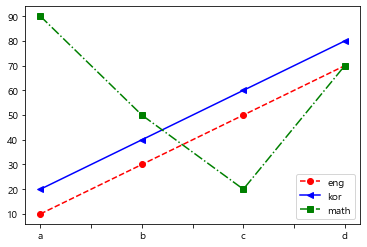

In [147]:

df.plot(kind='line', style=['ro--','b<-','gs-.'])

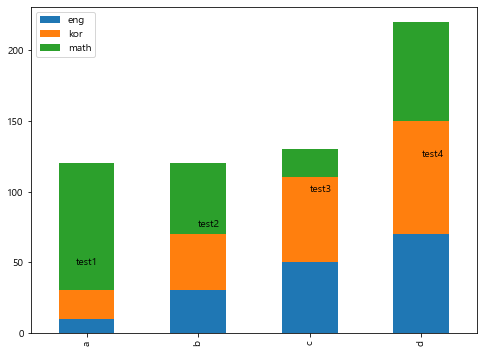

In [67]:
# stacked = True 컬럼데이터를 쌓아서 표현
df.plot(kind='bar', figsize=(8,6), stacked=True)
# x좌표 0, y좌표 50인 부분에 문자열 삽입
plt.text(0,50,'test1', va='center', ha='center') 
plt.text(1,75,'test2')
plt.text(2,100,'test3')
plt.text(3,125,'test4')
plt.show()

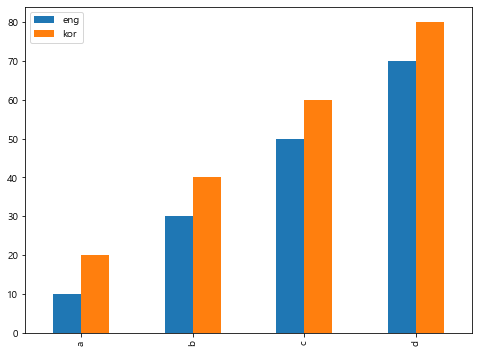

In [74]:
# 특정 컬럼만 지정가능
df.plot(kind='bar',figsize=(8,6), y=['eng','kor'])
plt.show()

<AxesSubplot:xlabel='[eng]', ylabel='[math]'>

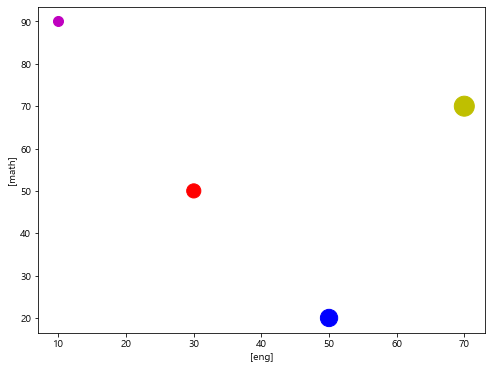

In [149]:
# scatter 산점 그래프 
# s = 사이즈, c = 색상 (r,g,b,k,m,y,c)
df.plot(kind='scatter',figsize=(8,6), x=['eng'], y=['math'], 
        s=[100,200,300,400], c=['m','r','b','y'])

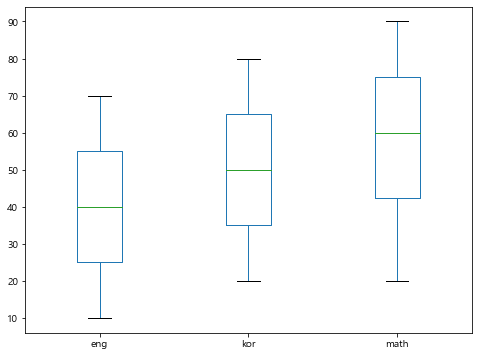

In [90]:
df.plot(kind='box',figsize=(8,6))
plt.show()

In [92]:
# 컬럼값 추출 
for n in df: #df.columns
    print(n)

eng
kor
math


In [101]:
for n in df.items():
    print(n)

('eng', a    10
b    30
c    50
d    70
Name: eng, dtype: int64)
('kor', a    20
b    40
c    60
d    80
Name: kor, dtype: int64)
('math', a    90
b    50
c    20
d    70
Name: math, dtype: int64)


In [97]:
for n,sr in df.items(): #df.columns
    print(n,sr['a'],sr['b'],sr['c'],sr['d'])

eng 10 30 50 70
kor 20 40 60 80
math 90 50 20 70


In [102]:
for n in df.iterrows():
    print(n)

('a', eng     10
kor     20
math    90
Name: a, dtype: int64)
('b', eng     30
kor     40
math    50
Name: b, dtype: int64)
('c', eng     50
kor     60
math    20
Name: c, dtype: int64)
('d', eng     70
kor     80
math    70
Name: d, dtype: int64)


In [100]:
for n,sr in df.iterrows():
    print(n,sr['eng'],sr['kor'],sr['math'])

a 10 20 90
b 30 40 50
c 50 60 20
d 70 80 70


In [112]:
df['eng'][0]

10

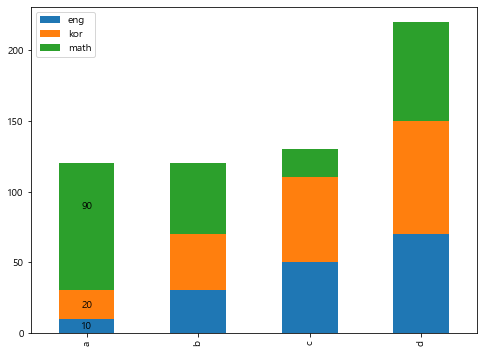

In [132]:
df.plot(kind='bar', figsize=(8,6), stacked=True)
# x좌표 0, y좌표 50인 부분에 문자열 삽입
plt.text(0,df['eng'][0]/2,df['eng'][0], va='center', ha='center') 
plt.text(0,df['kor'][0],df['kor'][0], va='center', ha='center') 
plt.text(0,df['math'][0],df['math'][0], va='center', ha='center') 

plt.show()

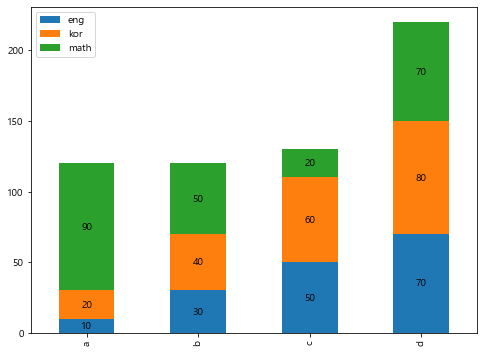

In [135]:
df.plot(kind='bar', figsize=(8,6), stacked=True)
for n in range(0,4):
    plt.text(n,df['eng'][n]/2, df['eng'][n], va='center', ha='center') 
    plt.text(n,df['eng'][n]+df['kor'][n]/2, df['kor'][n], va='center', ha='center') 
    plt.text(n,(df['eng'][n]+df['kor'][n])+df['math'][n]/2,df['math'][n], va='center', ha='center')  
plt.show()

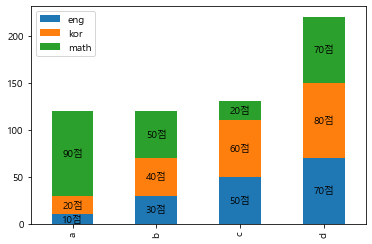

In [141]:
df.plot(kind='bar', stacked=True)
# plt.text(0,50,'test1', va='center', ha='center')
# plt.text(1,50,'test2', va='center', ha='center')

n = 0
for i, sr in df.iterrows():
    e,k,m = (sr['eng'], sr['kor'], sr['math'] )
    plt.text(n,e/2,f'{e}점', va='center', ha='center')
    plt.text(n,e+k/2,f'{k}점', va='center', ha='center')
    plt.text(n,e+k+m/2,f'{m}점', va='center', ha='center')
    n+=1

plt.show()
